# Importing dependencies

In [1]:
from scipy.io import wavfile
import numpy as np
import matplotlib.pyplot as plt
import sounddevice as sd

import random
import string
from Crypto.Cipher import AES

## Taking input

/tmp/ipykernel_98236/226715151.py:1: WavFileWarning: Reached EOF prematurely; finished at 1210889 bytes, expected 1210892 bytes from header.
  fs, data = wavfile.read('test.wav')


Text(0.5, 1.0, 'Original Audio Plot')

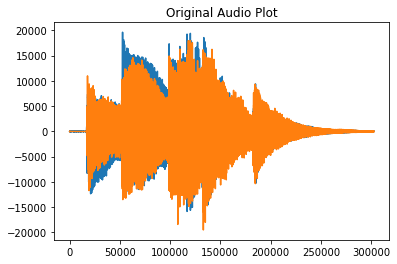

In [4]:
fs, data = wavfile.read('test.wav')
plt.plot(data)            # fs = sampling frequency = 44.1kHz
plt.title("Original Audio Plot")

In [9]:
with open('test.wav', 'rb') as fd:
    contents = fd.read()

## Playing that sound

In [8]:
sd.play(data, fs)

## Getting ready with AES

In [10]:
AES_KEY = ''.join(random.choice(string.ascii_uppercase + string.ascii_lowercase + string.digits) for x in range(32))

AES_IV = ''.join(random.choice(string.ascii_uppercase + string.ascii_lowercase + string.digits) for x in range(16))

In [11]:
print("AES Key is ", AES_KEY)
print("AES Initialization vector is ", AES_IV)

AES Key is  4hvyHuGrTkswzrvWM88v6SiPL4pv88lY
AES Initialization vector is  l3ytuY3HdM29xyJJ


## Encrpytion of audio file

In [12]:
encryptor = AES.new(AES_KEY.encode("utf-8"), AES.MODE_CFB, AES_IV.encode("utf-8"))
encrypted_audio = encryptor.encrypt(contents)

## Saving the encrypted file

In [13]:
with open('encrypted_audio_file.wav', 'wb') as fd:
    fd.write(encrypted_audio)
print("A file titled 'encrypted_audio_file.wav' is generated which is the encrypted audio to be communicated")

A file titled 'encrypted_audio_file.wav' is generated which is the encrypted audio to be communicated


## Loading

In [14]:
with open('encrypted_audio_file.wav', 'rb') as fd:
    contents = fd.read()

## Decryption of data

In [15]:
decryptor = AES.new(AES_KEY.encode("utf-8"), AES.MODE_CFB, AES_IV.encode("utf-8"))
decrypted_audio = decryptor.decrypt(contents)

In [17]:
with open('decrypted_audio_file.wav', 'wb') as fd:
    fd.write(decrypted_audio)

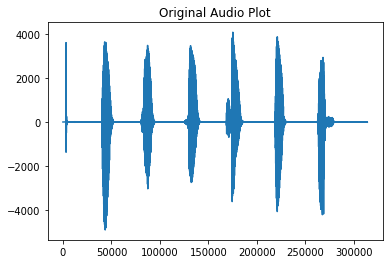

In [18]:
fs, data = wavfile.read('decrypted_audio_file.wav')
plt.plot(data)            # fs = sampling frequency = 44.1kHz
plt.title("Original Audio Plot")
data_1 = np.asarray(data, dtype = np.int32)

In [19]:
sd.play(data, fs)